In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(style="whitegrid")

In [3]:
x_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

In [4]:
x_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

In [9]:
scaler = StandardScaler()
x_moons_scaled = scaler.fit_transform(x_moons)
x_blobs_scaled = scaler.fit_transform(x_blobs)

In [12]:
def apply_clustering(X, name):
    return {
        "DBSCAN": DBSCAN(eps=0.3 if name == "moons" else 0.5, min_samples=5).fit_predict(X), 
        "KMeans": KMeans(n_clusters=2 if name == "moons" else 3, random_state=42). fit_predict(X),
        "Hierarchical": AgglomerativeClustering(n_clusters=2 if name == "moons" else 3).fit_predict(X)
    }

labels_moons = apply_clustering(x_moons_scaled, "moons")
labels_blobs = apply_clustering(x_blobs_scaled, "blobs")

In [13]:
def plot_clusters(X, labels_dict, title_prefix, filename):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    for ax, (name, labels) in zip(axes, labels_dict.items()):
        scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, edgecolor='k')
        ax.set_title(f"{title_prefix} - {name}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

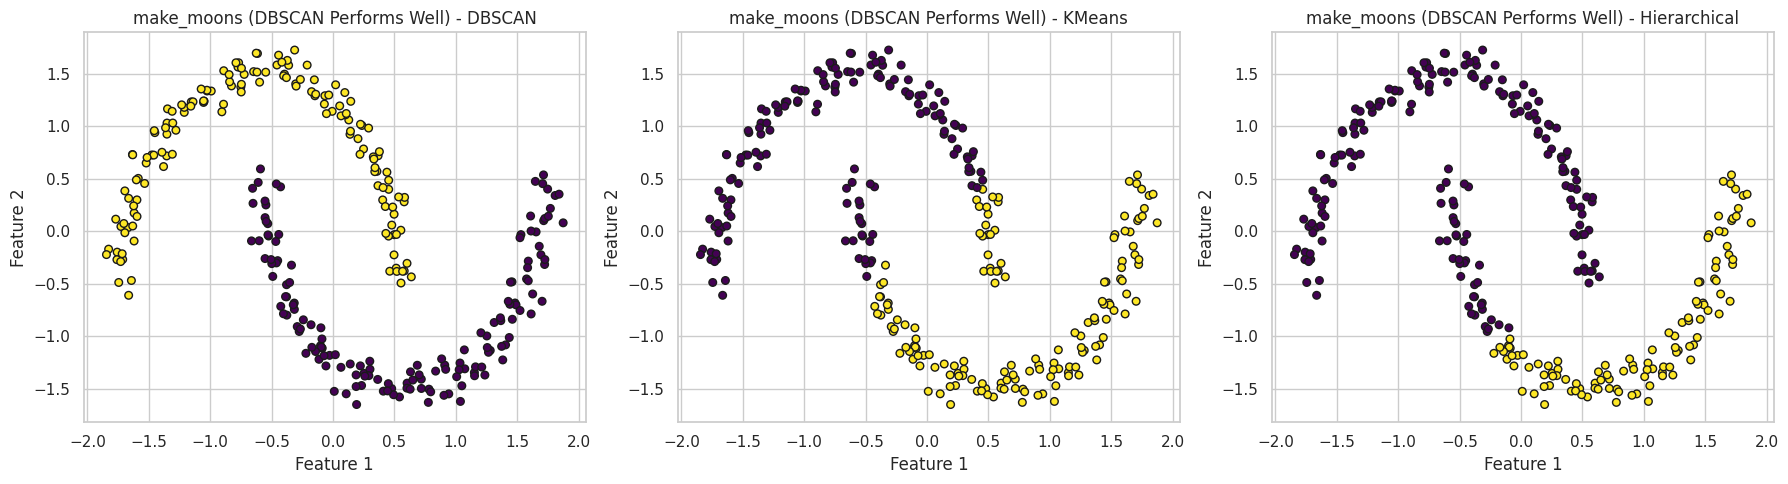

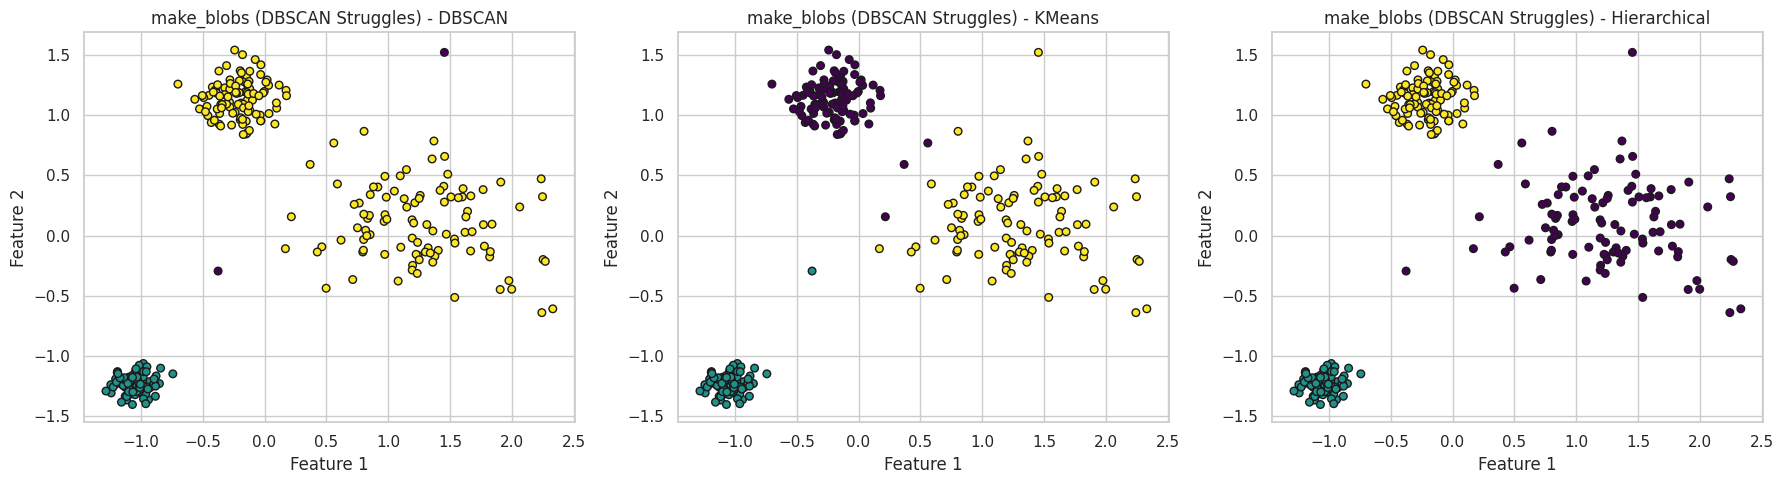

In [14]:
plot_clusters(x_moons_scaled, labels_moons, "make_moons (DBSCAN Performs Well)", "moons_clusters.png")
plot_clusters(x_blobs_scaled, labels_blobs, "make_blobs (DBSCAN Struggles)", "blobs_clusters.png")